## Introduction:

In this competition, you are provided with 1.5 years of customers behavior data from Santander bank to predict what new products customers will purchase. 

The data starts at 2015-01-28 and has monthly records of products a customer has, such as "credit card", "savings account", etc. 

You will predict what additional products a customer will get in the last month, 2016-06-28, in addition to what they already have at 2016-05-28. These products are the columns named: ind_(xyz)_ult1, which are the columns #25 - #48 in the training data. You will predict what a customer will buy in addition to what they already had at 2016-05-28. 

Cometition Link ==> https://www.kaggle.com/c/santander-product-recommendation/data

Fork Notebooks ==> https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python

In [322]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import timeit
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None 

## Analysis steps:

1. Data exploration 
2. Data cleaning, cleansing (including feature reduction) 
3. Modeling 

## Reading the data ..

The size of the data is about 1.3 GB ! .. 

Reading it as one unit using the traditional built in functions won't help ! .. 

Let's try to read them as chuncks .. 

In [323]:
reader = pd.read_csv('train_ver2.csv', chunksize=1000000, header=0)

In [324]:
reader.get_chunk()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0


We are working only on 1000000 records (just for obtaining better performance) ..

Let's divide it to training and validation .. 

In [325]:
# data .. 80% of the data as training data
train = (len(reader.get_chunk())*80)/100
ntrain, ntest = reader.get_chunk()[:train], reader.get_chunk()[train+1:]

In [326]:
len(ntrain), len(ntest) #training vs testing data 

(800000, 199999)

In [327]:
data = reader.get_chunk()
type(data)

pandas.core.frame.DataFrame

In [328]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): ['ncodpers',
  'age',
  'ind_nuevo',
  'antiguedad',
  'indrel',
  'tipodom',
  'ind_actividad_cliente',
  'ind_ahor_fin_ult1',
  'ind_aval_fin_ult1',
  'ind_cco_fin_ult1',
  'ind_cder_fin_ult1',
  'ind_cno_fin_ult1',
  'ind_ctju_fin_ult1',
  'ind_ctma_fin_ult1',
  'ind_ctop_fin_ult1',
  'ind_ctpp_fin_ult1',
  'ind_deco_fin_ult1',
  'ind_deme_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_ecue_fin_ult1',
  'ind_fond_fin_ult1',
  'ind_hip_fin_ult1',
  'ind_plan_fin_ult1',
  'ind_pres_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_tjcr_fin_ult1',
  'ind_valo_fin_ult1',
  'ind_viv_fin_ult1',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1',
  'ind_recibo_ult1'],
 dtype('float64'): ['cod_prov', 'renta'],
 dtype('O'): ['fecha_dato',
  'ind_empleado',
  'pais_residencia',
  'sexo',
  'fecha_alta',
  'ult_fec_cli_1t',
  'indrel_1mes',
  'tiprel_1mes',
  'indresi',
  'indext',
  'conyuemp',
  'canal_entrada',
  'indfall',
  'nomprov',
  'segmento']}

Three data types exist .. 
Int, float and categorical data ..

Let's calculate centeral tendancy measures and despersion measures for the numerical data ..


## 1. Age: 

In [329]:
data.age.describe()

count    1000000.000000
mean          39.687878
std           17.035493
min            2.000000
25%           24.000000
50%           38.000000
75%           50.000000
max          163.000000
Name: age, dtype: float64

## 2. New customer Index:

In [330]:
data.ind_nuevo.describe()

count    1000000.000000
mean           0.036326
std            0.187100
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: ind_nuevo, dtype: float64

ind_nuebvo is the New customer Index. 1 if the customer registered in the last 6 months ..

In [331]:
data.ind_nuevo

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
999970    0
999971    0
999972    0
999973    0
999974    0
999975    0
999976    0
999977    0
999978    0
999979    0
999980    0
999981    0
999982    0
999983    0
999984    0
999985    0
999986    0
999987    0
999988    0
999989    0
999990    0
999991    0
999992    0
999993    0
999994    0
999995    0
999996    0
999997    0
999998    0
999999    0
Name: ind_nuevo, dtype: int64

hence, it doesn't make sense to calculate the mean !! ..

Let's count the number of new customers instead ..

In [332]:
count_ones = []

for i in data.ind_nuevo:
    if i == 1:
        count_ones.append(i)

In [333]:
len(count_ones)

36326

Hence, we have 151010 new customers in the 1000000 customers in total ..

### One minutes ! .. 

Here we are working on the whole data .. let's work on only the training data ..

In [334]:
ntrain.age.describe()

count     800000
unique       115
top           23
freq       75826
Name: age, dtype: object

In [335]:
data.age.isnull().any().any()  ## no NAs !!

False

In [336]:
ntrain.age.isnull().any().any() # no NAs ! .. great (y)

False

In [337]:
data.age

0         39
1         32
2         35
3         62
4         42
5         85
6         35
7         74
8         50
9         64
10        65
11        64
12        54
13        57
14        43
15        42
16        36
17        54
18        37
19        30
20        64
21        47
22        57
23        52
24        44
25        40
26        39
27        39
28        58
29        46
          ..
999970    49
999971    21
999972    36
999973    21
999974    21
999975    21
999976    54
999977    29
999978    22
999979    20
999980    21
999981    23
999982    21
999983    21
999984    21
999985    21
999986    26
999987    40
999988    21
999989    21
999990    21
999991    23
999992    21
999993    20
999994    25
999995    21
999996    21
999997    21
999998    22
999999    21
Name: age, dtype: int64

In [338]:
ntrain.age

0          26
1          19
2          67
3          33
4          49
5          70
6          49
7          65
8          34
9          45
10         65
11         50
12         42
13         36
14         34
15         47
16         43
17         37
18         47
19         47
20         42
21         39
22         53
23         47
24         35
25         41
26         39
27         63
28         36
29         37
         ... 
799970     70
799971     29
799972     62
799973     38
799974     30
799975     72
799976     39
799977     36
799978     31
799979     34
799980     40
799981     31
799982     47
799983     33
799984     46
799985     48
799986     33
799987     33
799988     21
799989     45
799990     37
799991     36
799992     34
799993     23
799994     38
799995     47
799996     42
799997     40
799998     33
799999     39
Name: age, dtype: object

No NAs are found in the age column .. 

the most freq. age is 23 .. and there are 115 unique age values ..

{'boxes': [<matplotlib.lines.Line2D at 0x7f519ba72f90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f519ba72e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f519b957f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f519b9ab8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f519ba72850>,
  <matplotlib.lines.Line2D at 0x7f519ba72390>]}

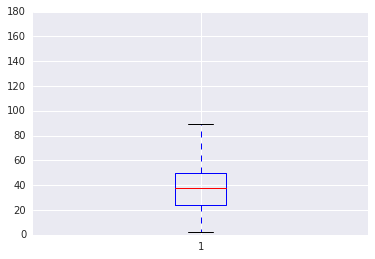

In [339]:
plt.boxplot(data.age)

The box plot above shows ages > 100 and < 10 years old ! .. which is a little bit unexpected ! .. 

let's count them ..

In [340]:
count_older = []
count_young = []

for i in data.age:
    if i > 100:
        count_older.append(i)
    elif i < 10:
        count_young.append(i)

In [341]:
len(count_older), len(count_young)

(911, 1984)

There are 911 customer with age > 100 .. and about 1984 below age of 10 ! .. 

This is just a reminder .. we are working only on a sample of data ..

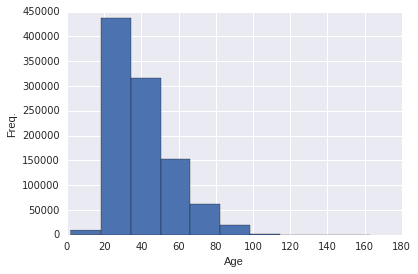

In [342]:
plt.hist(data.age)
plt.xlabel("Age")
plt.ylabel("Freq.")

In [343]:
ntrain.ind_nuevo.count()

795661

In [344]:
ntrain.ind_nuevo.isnull().any().any()  ## contains NAs !!

True

Yes, NAs are there ! :S

In [345]:
print "Number of NAs: ", len(ntrain.ind_nuevo) - ntrain.ind_nuevo.count()  #800000 - 795661

Number of NAs:  4339


In [346]:
ntrain.ind_nuevo.unique()

array([  0.,  nan,   1.])

Let's explore another variable ..

## 3. Customer seniority (in months)

In [347]:
ntrain.antiguedad.describe()

count      800000
unique        249
top            12
freq        34732
Name: antiguedad, dtype: object

In [348]:
ntrain.antiguedad

0              70
1              72
2              72
3              72
4              72
5              66
6              72
7              72
8              72
9              72
10             72
11             72
12             72
13             72
14             66
15             72
16             72
17             72
18             72
19             40
20             72
21             72
22             72
23             72
24             72
25             72
26             72
27             64
28             71
29             72
           ...   
799970         13
799971         13
799972         13
799973         13
799974         13
799975         13
799976         13
799977         13
799978         18
799979         13
799980         13
799981         13
799982         13
799983         13
799984         13
799985          9
799986         13
799987         13
799988         13
799989         13
799990         13
799991         13
799992         13
799993         13
799994    

In [349]:
ntrain.antiguedad.isnull().any().any()  ## no NAs !!

False

## 4. indrel 	

1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

In [350]:
ntrain.indrel.describe()

count    795661.000000
mean          1.147555
std           3.799824
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: indrel, dtype: float64

In [351]:
ntrain.indrel.unique()

array([  1.,  nan,  99.])

It makes no sense to calculate its mean value .. and it already have either 1 or 99 .. 
NAs are there as well .. 

In [352]:
ntrain.indrel.value_counts()

1     794463
99      1198
Name: indrel, dtype: int64

## 5. tipodom:

- Addres type. 1 means primary address
- It doesn't seem to be useful, and the province code is not needed because the name of the province exists in nomprov ( Province name).

In [353]:
ntrain.tipodom

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
799970    1
799971    1
799972    1
799973    1
799974    1
799975    1
799976    1
799977    1
799978    1
799979    1
799980    1
799981    1
799982    1
799983    1
799984    1
799985    1
799986    1
799987    1
799988    1
799989    1
799990    1
799991    1
799992    1
799993    1
799994    1
799995    1
799996    1
799997    1
799998    1
799999    1
Name: tipodom, dtype: float64

In [354]:
ntrain.nomprov

0              MADRID
1              MADRID
2           BARCELONA
3         PALMAS, LAS
4              MADRID
5              MALAGA
6              MADRID
7           CANTABRIA
8              MADRID
9              MADRID
10             MALAGA
11             MALAGA
12          SALAMANCA
13           ASTURIAS
14             MADRID
15             MADRID
16            OURENSE
17              AVILA
18             MADRID
19             MADRID
20             MADRID
21          CANTABRIA
22          BARCELONA
23          BARCELONA
24             MADRID
25             MADRID
26          CANTABRIA
27          TARRAGONA
28             MADRID
29           GIPUZKOA
             ...     
799970      CASTELLON
799971       VALENCIA
799972     VALLADOLID
799973       VALENCIA
799974         BURGOS
799975         MADRID
799976      BARCELONA
799977      BARCELONA
799978          CADIZ
799979         MADRID
799980      CORUÑA, A
799981      CORUÑA, A
799982      BARCELONA
799983         BURGOS
799984    

The value of (CORUÑA, A) is incorrect .. there was an error in the unicode character N .. 

We might fix it manually by removing the hat on its top .. 

In [355]:
ntrain.loc[ntrain.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"
ntrain.nomprov

0              MADRID
1              MADRID
2           BARCELONA
3         PALMAS, LAS
4              MADRID
5              MALAGA
6              MADRID
7           CANTABRIA
8              MADRID
9              MADRID
10             MALAGA
11             MALAGA
12          SALAMANCA
13           ASTURIAS
14             MADRID
15             MADRID
16            OURENSE
17              AVILA
18             MADRID
19             MADRID
20             MADRID
21          CANTABRIA
22          BARCELONA
23          BARCELONA
24             MADRID
25             MADRID
26          CANTABRIA
27          TARRAGONA
28             MADRID
29           GIPUZKOA
             ...     
799970      CASTELLON
799971       VALENCIA
799972     VALLADOLID
799973       VALENCIA
799974         BURGOS
799975         MADRID
799976      BARCELONA
799977      BARCELONA
799978          CADIZ
799979         MADRID
799980      CORUNA, A
799981      CORUNA, A
799982      BARCELONA
799983         BURGOS
799984    

In [356]:
ntrain.nomprov.unique()

array(['MADRID', 'BARCELONA', 'PALMAS, LAS', 'MALAGA', 'CANTABRIA',
       'SALAMANCA', 'ASTURIAS', 'OURENSE', 'AVILA', 'TARRAGONA',
       'GIPUZKOA', 'CORUNA, A', nan, 'BIZKAIA', 'GRANADA',
       'SANTA CRUZ DE TENERIFE', 'CORDOBA', 'CASTELLON', 'MURCIA', 'LEON',
       'PONTEVEDRA', 'GIRONA', 'SEVILLA', 'VALENCIA', 'CACERES',
       'ZARAGOZA', 'BURGOS', 'ALBACETE', 'CADIZ', 'RIOJA, LA',
       'VALLADOLID', 'SORIA', 'BADAJOZ', 'HUELVA', 'SEGOVIA', 'ALICANTE',
       'CUENCA', 'NAVARRA', 'MELILLA', 'GUADALAJARA', 'CIUDAD REAL',
       'BALEARS, ILLES', 'TOLEDO', 'LUGO', 'ZAMORA', 'ALAVA', 'HUESCA',
       'LERIDA', 'ALMERIA', 'CEUTA', 'PALENCIA', 'JAEN', 'TERUEL'], dtype=object)

In [357]:
len(ntrain.nomprov.unique())

53

54 unique value ! 

In [358]:
ntrain.cod_prov   ## customer address .. 

0         28
1         28
2          8
3         35
4         28
5         29
6         28
7         39
8         28
9         28
10        29
11        29
12        37
13        33
14        28
15        28
16        32
17         5
18        28
19        28
20        28
21        39
22         8
23         8
24        28
25        28
26        39
27        43
28        28
29        20
          ..
799970    12
799971    46
799972    47
799973    46
799974     9
799975    28
799976     8
799977     8
799978    11
799979    28
799980    15
799981    15
799982     8
799983     9
799984    28
799985    28
799986    28
799987     3
799988    28
799989     2
799990    35
799991    12
799992    41
799993    30
799994    11
799995    46
799996    28
799997    37
799998    30
799999    11
Name: cod_prov, dtype: float64

## 6. Renta: 
It is the Gross income of the household

In [359]:
ntrain.renta.describe()

count      657771.000000
mean       125335.898002
std        211387.891678
min          1202.730000
25%         65047.155000
50%         95212.770000
75%        144699.360000
max      28894395.510000
Name: renta, dtype: float64

In [360]:
len(ntrain.renta.unique())

343742

There are 9889 unique value in renta variable ..

In [361]:
ntrain.renta

0         127681.05
1         486086.79
2         433766.73
3          62722.38
4         144368.91
5         113412.18
6         165552.78
7         278416.98
8         203455.92
9         272419.41
10        175256.28
11         58793.52
12         77270.91
13        111053.40
14         85163.64
15         81588.87
16         92711.16
17        104430.21
18         91326.78
19              NaN
20        293277.00
21              NaN
22        129752.25
23         87561.51
24         85909.20
25        169383.54
26         28991.16
27         91240.32
28        236090.34
29              NaN
            ...    
799970     32051.88
799971          NaN
799972     14026.20
799973    139024.74
799974     70428.90
799975    150832.23
799976    128645.58
799977    133183.98
799978     24756.36
799979     77672.25
799980    111424.32
799981     54349.35
799982    110581.83
799983    122889.06
799984    127124.76
799985    127124.76
799986     94577.76
799987     31007.25
799988     65725.23


It contains NAs ! .. 

Let's replace them by the mean value .. 

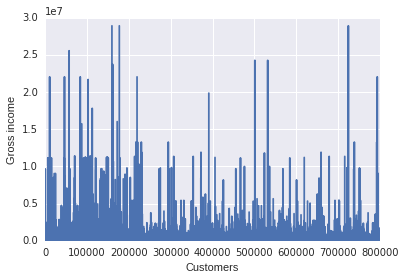

In [362]:
plt.plot(ntrain.renta)
plt.xlabel("Customers")
plt.ylabel("Gross income")

## Let's explore the whole variables at the same time .. 
    
instead of working on each seperately !

In [363]:
unique_ids   = pd.Series(ntrain["ncodpers"].unique())
limit_people = 1.2e4
unique_id = unique_ids.sample(n=limit_people)
ntrain = ntrain[ntrain.ncodpers.isin(unique_id)]
ntrain.describe()

,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,18676.000000,18588.000000,18588.000000,18588.000000,18588,18514.000000,18588.000000,15479.000000,18676.000000,18676,...,18676.000000,18676.000000,18676.000000,18676.000000,18676.00000,18676.000000,18676.000000,18630.000000,18630.000000,18676.000000
mean,937134.782716,0.024586,1.137078,1.000215,1,26.316031,0.500861,122971.262510,0.000161,0,...,0.003855,0.007818,0.002356,0.042193,0.03973,0.018955,0.002784,0.052120,0.056844,0.134504
std,391503.440035,0.154863,3.662724,0.020745,0,13.031090,0.500013,162785.554707,0.012673,0,...,0.061972,0.088073,0.048482,0.201035,0.19533,0.136369,0.052695,0.222275,0.231550,0.341202
min,15988.000000,0.000000,1.000000,1.000000,1,1.000000,0.000000,3796.860000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,893304.000000,0.000000,1.000000,1.000000,1,15.000000,0.000000,64774.980000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1056602.500000,0.000000,1.000000,1.000000,1,28.000000,1.000000,94664.220000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1214349.750000,0.000000,1.000000,1.000000,1,35.000000,1.000000,143408.880000,0.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1399395.000000,1.000000,99.000000,3.000000,1,52.000000,1.000000,11139895.560000,1.000000,0,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Check Null values:


In [364]:
ntrain.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [365]:
ntrain["ind_nuevo"].isnull().sum()

88

In [366]:
np.sum(ntrain["antiguedad"].isnull())

0

I think it is not seen as a numeric varaible !

In [367]:
ntrain.antiguedad = pd.to_numeric(ntrain.antiguedad,errors="coerce")
type(ntrain.antiguedad)

pandas.core.series.Series

In [368]:
np.sum(ntrain["antiguedad"].isnull())

88

## Let's explore the Date variables .. 

We have two data variables:
1. fecha_dato ==> The table is partitioned for this column
2. fecha_alta ==> The date in which the customer became as the first holder of a contract in the bank

In [369]:
ntrain["fecha_dato"] = pd.to_datetime(ntrain["fecha_dato"],format="%Y-%m-%d")
ntrain["fecha_alta"] = pd.to_datetime(ntrain["fecha_alta"],format="%Y-%m-%d")
ntrain["fecha_dato"].unique()

array(['2015-04-28T00:00:00.000000000', '2015-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [370]:
ntrain["fecha_alta"].unique()

array(['2009-07-07T00:00:00.000000000', '2009-07-08T00:00:00.000000000',
       '2009-06-30T00:00:00.000000000', ...,
       '2015-05-06T00:00:00.000000000', '2015-05-08T00:00:00.000000000',
       '2015-05-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [371]:
ntrain["fecha_dato"].isnull().any().any()

False

In [372]:
ntrain["fecha_alta"].isnull().any().any()

True

In [373]:
ntrain["fecha_dato"].describe()  # unique values are only two (only two table partitions)

count                   18676
unique                      2
top       2015-04-28 00:00:00
freq                    11926
first     2015-04-28 00:00:00
last      2015-05-28 00:00:00
Name: fecha_dato, dtype: object

In [374]:
ntrain["fecha_alta"].describe()

count                   18588
unique                   3137
top       2014-07-28 00:00:00
freq                      148
first     1995-01-16 00:00:00
last      2015-05-28 00:00:00
Name: fecha_alta, dtype: object

## Let's work on the categorical variables indicate customer status .. 

### 1. ind_actividad_cliente:
active/ inactive customer .. 

In [375]:
## customer indicator .. 
ntrain.ind_actividad_cliente.value_counts()

1    9310
0    9278
Name: ind_actividad_cliente, dtype: int64

Around 9485 active customer and 9076 inactive .. 

It already checked that it contains NAs .. however, let's make a double check before manipulating them ..

In [376]:
ntrain.ind_actividad_cliente.unique()

array([  1.,   0.,  nan])

In [377]:
ntrain.ind_actividad_cliente.isnull().any().any()

True

Null values are not there !! :S :S ..

## Manipulate Null values:

1. If age < 18 or > 100 .. replace it with the mean value .. cuase this is illogical to have age values for bank clients outside this range 

In [378]:
ntrain.loc[(ntrain.age >= 100) | (ntrain.age <= 18),"age"].fillna(ntrain.age.mean)

24         35
91         44
111        30
122        51
212        26
232        55
239        43
374        44
400        41
426        45
445        20
468        40
493        42
556        64
562        63
627        59
639        48
687        40
755        38
787        52
807        40
913        43
1044       47
1074       41
1281       44
1406       47
1418       55
1436       60
1464       16
1488       57
         ... 
798835     36
798853     41
798870     39
798930     41
798936     30
798946     33
798983     31
798988     32
799145     51
799309     75
799310     65
799376     46
799383     23
799391     34
799457     64
799464     61
799467     30
799503     34
799509     58
799555     42
799568     27
799621     42
799692     37
799727     83
799729     40
799862     69
799945     40
799965     32
799973     38
799985     48
Name: age, dtype: object

In [379]:
ntrain.age.isnull().any().any()

False

## Great .. 
Null values are replaced with the mean value ..

Let's fill in the missing values for ind_nuevo variable that indicates the novelity of the customer .. 

Let's check the history of the customer who have null value and fill in his cell by 1 (defualt to treate him as novel customer)

In [380]:
ntrain.loc[ntrain["ind_nuevo"].isnull(),"ind_nuevo"] = 1

In [381]:
ntrain.ind_nuevo.isnull().any().any()

False

Great, missing values are filled in age and ind_nuevo variables ! .. 

Let's check antiguedad variable ..

In [382]:
ntrain.loc[ntrain.antiguedad < 0] 

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1


In [383]:
min(ntrain.antiguedad)

0.0

No negative values are there and the minimum value is zero .. 

It doesn't contain NAs (as checked above) ..

Let's fill in the missing values for indrel variable .. It is more logical to fill in these values by the median .. ! 

In [384]:
ntrain.loc[ntrain["indrel"].isnull()] = ntrain.indrel.median()

In [385]:
ntrain.indrel.unique()

array([  1.,  99.])

In [386]:
ntrain.indrel.value_counts()

1     18650
99       26
Name: indrel, dtype: int64

(array([ 18650.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,     26.]),
 array([  1. ,  10.8,  20.6,  30.4,  40.2,  50. ,  59.8,  69.6,  79.4,
         89.2,  99. ]),
 <a list of 10 Patch objects>)

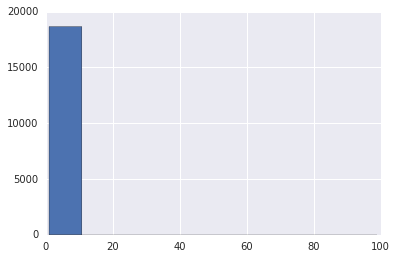

In [387]:
plt.hist(ntrain.indrel)

How come the value_counts decreases after manipulating the missing values !! :S

## Fill NAs for Date variables .. 
Let's check the date variables .. Null values should be replaced by the date of the median !

In [388]:
dates = ntrain.loc[:,"fecha_alta"].sort_values().reset_index()
dates

,index,fecha_alta
0,203801,1970-01-01 00:00:00.000000001
1,95948,1970-01-01 00:00:00.000000001
2,299221,1970-01-01 00:00:00.000000001
3,298427,1970-01-01 00:00:00.000000001
4,204869,1970-01-01 00:00:00.000000001
5,297719,1970-01-01 00:00:00.000000001
6,104434,1970-01-01 00:00:00.000000001
7,292604,1970-01-01 00:00:00.000000001
8,340080,1970-01-01 00:00:00.000000001
9,405198,1970-01-01 00:00:00.000000001


In [389]:
median_date = int(np.median(dates.index.values))
median_date  # the index of the median date

9337

In [390]:
ntrain.loc[ntrain.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]

In [391]:
ntrain.fecha_alta.isnull().any().any()

False

## Dropping unnecessary variables:

In [392]:
ntrain.drop(["tipodom","cod_prov"],axis=1,inplace=True)

In [393]:
ntrain

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
24,2015-04-28,846000,N,ES,H,35,2009-07-07,0,72,1,...,0,0,0,1,0,0,0,1,1,1
91,2015-04-28,846081,N,ES,V,44,2009-07-08,0,72,1,...,0,0,0,0,0,0,0,0,0,0
111,2015-04-28,845416,N,ES,V,30,2009-06-30,0,73,1,...,0,0,0,0,0,0,0,0,0,0
122,2015-04-28,845500,N,ES,V,51,2009-07-01,0,73,1,...,0,0,0,0,0,0,0,0,0,0
212,2015-04-28,845730,N,ES,H,26,2009-07-06,0,72,1,...,0,0,0,0,0,0,0,0,0,0
232,2015-04-28,845569,N,ES,H,55,2009-07-02,0,72,1,...,0,0,0,0,0,0,0,0,0,0
239,2015-04-28,845638,N,ES,V,43,2009-07-02,0,72,1,...,0,0,0,0,0,0,0,0,0,0
374,2015-04-28,665502,N,ES,V,44,2006-12-29,0,103,1,...,0,0,0,0,0,0,0,0,0,0
400,2015-04-28,665535,N,ES,H,41,2006-12-29,0,35,1,...,0,0,0,0,0,0,0,0,0,0
426,2015-04-28,665047,N,ES,H,45,2006-12-27,0,103,1,...,0,0,0,1,0,1,0,1,1,1


number of columns decreases by two .. which means the columns already deleted !

## nomprov: 
Fill in the missing values by the median deosn't make sense .. 

It is more logical to fill it with the keyword (Unknown) .. 

It also contains value of 1 .. probably this is a typo !

In [394]:
ntrain.loc[ntrain.nomprov.isnull(),"nomprov"] = "UNKNOWN"

## Renta Variable .. 
Let's replace NAs in this variable ..

In [395]:
ntrain.renta.mean(), ntrain.renta.median()

(122276.11359863816, 94324.98)

Mean is bigger than median and difference is huge !! .. 

This means that outliers are there ! .. 

Hence, replacing NAs with the mean value might be misleading .. a more rebust solution is to replace it with the median ! .. 

However, let's divide it down by region and fill in NAs according to the region instead of working on the whole regions at the same time ! .. 

reference ==> https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python

In [396]:
incomes = ntrain.loc[ntrain.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":np.median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in ntrain.nomprov.unique()],ordered=False)
incomes.head()

,nomprov,renta
,,MedianIncome
0,1,1.000
1,CIUDAD REAL,60293.370
2,BADAJOZ,60480.570
3,CASTELLON,61087.110
4,ALICANTE,61475.955


Again, the value of 1 is typo !! .. 

Where it is come from !! :S

## Let's plot the income distribution by city:

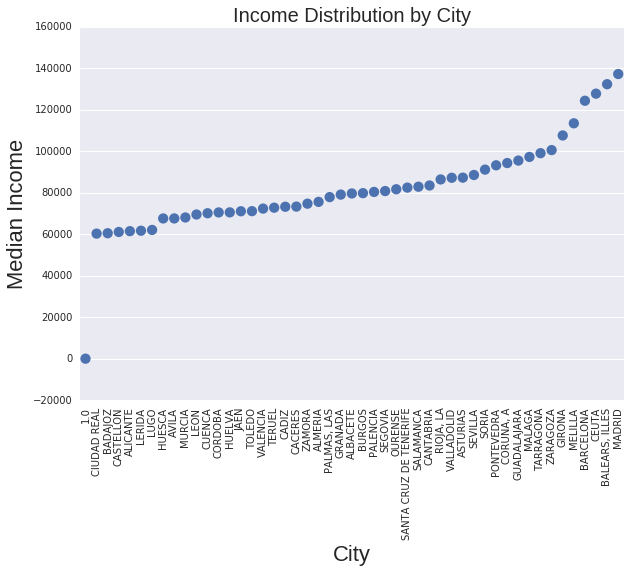

In [397]:
h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   linestyles="None") ## to remove the line between dots 
plt.xticks(rotation=90)
plt.xlabel("City",size=22)
plt.ylabel("Median Income",size=22)
plt.title("Income Distribution by City",size=20)

## Comment:

There is a lot of variations in the median income .. 

Check NAs then assign missing incomes by providence .. 

### Steps:
1. Group the data by city, and reduce to get the median. 
2. Join this intermediate data frame  by the original city names to expand the aggregated median incomes.
3. Order so that there is a 1-to-1 mapping between the rows.
4. The missing values are replaced.

In [398]:
ntrain.renta.isnull().any().any(), ntrain.nomprov.isnull().any().any()

(True, False)

In [399]:
np.count_nonzero(ntrain.renta.isnull().values)

3109

There are 3298 NAs in renta variable (gross income) .. this is why it's important to manipulate them !

In [400]:
grouped = ntrain.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes = pd.merge(ntrain,grouped, how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
ntrain.sort_values("nomprov",inplace=True)
ntrain = ntrain.reset_index()
new_incomes = new_incomes.reset_index()

In [401]:
new_incomes

,index,nomprov,renta
0,13534,1,1.000
1,13532,1,1.000
2,13490,1,1.000
3,13531,1,1.000
4,13530,1,1.000
5,13529,1,1.000
6,13528,1,1.000
7,13527,1,1.000
8,13526,1,1.000
9,13513,1,1.000


In [402]:
ntrain.loc[ntrain.renta.isnull(),"renta"] = new_incomes.loc[ntrain.renta.isnull(),"renta"].reset_index()
ntrain.loc[ntrain.renta.isnull(),"renta"] = ntrain.loc[ntrain.renta.notnull(),"renta"].median()
ntrain.sort_values(by="fecha_dato", inplace=True)

In [403]:
ntrain.renta

0             1.00
63            1.00
62            1.00
61            1.00
60            1.00
59            1.00
58            1.00
57            1.00
56            1.00
64            1.00
55            1.00
53            1.00
52            1.00
51            1.00
50            1.00
49            1.00
48            1.00
47            1.00
46            1.00
54            1.00
65            1.00
66            1.00
67            1.00
87            1.00
86            1.00
85            1.00
84            1.00
83            1.00
82            1.00
81            1.00
           ...    
12435     92827.89
12433    175725.03
12431     94046.97
12430     72375.00
12429    128692.20
12424     94786.23
3854     105124.47
12421     57603.84
12420    121701.54
12419     67502.61
12418     73728.81
12414     53395.95
3859     269144.19
12410     61584.03
12409    107917.17
12408    108391.38
3861      55738.08
12405     47405.82
3864      94046.97
3865      94046.97
12399     94046.97
12398    206

In [404]:
ntrain.renta.isnull().any().any()

False

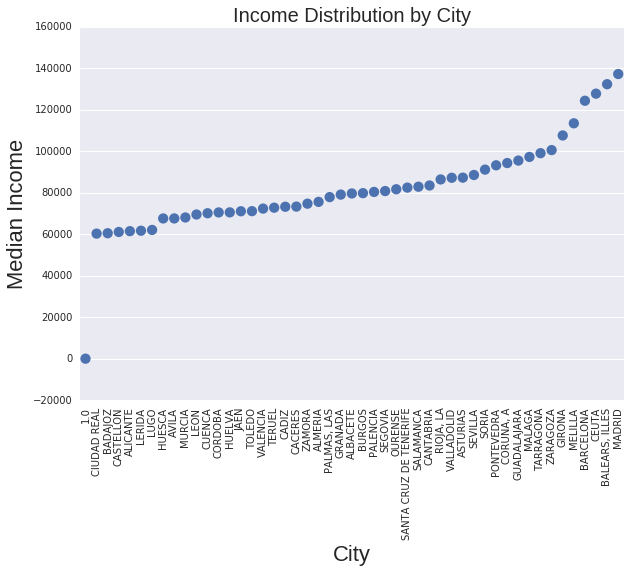

In [405]:
h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   linestyles="None") ## to remove the line between dots 
plt.xticks(rotation=90)
plt.xlabel("City",size=22)
plt.ylabel("Median Income",size=22)
plt.title("Income Distribution by City",size=20)

Yes, the data points become closer to each other !

## Dependent Variables ==> Products:

Let's work on the indicators (Dependent variables) ..

    ind_ahor_fin_ult1 	Saving Account

    ind_aval_fin_ult1 	Guarantees

    ind_cco_fin_ult1 	Current Accounts

    ind_cder_fin_ult1 	Derivada Account

    ind_cno_fin_ult1 	Payroll Account

    ind_ctju_fin_ult1 	Junior Account

    ind_ctma_fin_ult1 	Más particular Account

    ind_ctop_fin_ult1 	particular Account

    ind_ctpp_fin_ult1 	particular Plus Account

    ind_deco_fin_ult1 	Short-term deposits

    ind_deme_fin_ult1 	Medium-term deposits

    ind_dela_fin_ult1 	Long-term deposits

    ind_ecue_fin_ult1 	e-account

    ind_fond_fin_ult1 	Funds

    ind_hip_fin_ult1 	Mortgage

    ind_plan_fin_ult1 	Pensions

    ind_pres_fin_ult1 	Loans

    ind_reca_fin_ult1 	Taxes

    ind_tjcr_fin_ult1 	Credit Card

    ind_valo_fin_ult1 	Securities

    ind_viv_fin_ult1 	Home Account

    ind_nomina_ult1 	Payroll

    ind_nom_pens_ult1 	Pensions

    ind_recibo_ult1 	Direct Debit

In [410]:
ntrain.ix[:,25:48]

,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
63,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
62,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
61,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
60,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
59,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
58,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
56,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
64,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [411]:
ntrain.ix[:,25:48].describe()

,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,...,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18675.000000,18675.000000,18676.000000
mean,0.837492,0.005140,0.087385,0.011512,0.020347,0.096487,0.025809,0.009799,0.006211,0.045192,...,0.008460,0.012529,0.006854,0.045727,0.044442,0.023667,0.007496,0.056546,0.061258,0.138895
std,0.368926,0.071513,0.282406,0.106678,0.141188,0.295267,0.158568,0.098505,0.078568,0.207730,...,0.091591,0.111235,0.082505,0.208898,0.206081,0.152013,0.086258,0.230980,0.239810,0.345846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It makes no sense to calc the above describtion for boolean variables .. 

Let's check the NAs and unqiue values ..

In [413]:
ntrain.ix[:,25:48].isnull().any()

ind_cco_fin_ult1     False
ind_cder_fin_ult1    False
ind_cno_fin_ult1     False
ind_ctju_fin_ult1    False
ind_ctma_fin_ult1    False
ind_ctop_fin_ult1    False
ind_ctpp_fin_ult1    False
ind_deco_fin_ult1    False
ind_deme_fin_ult1    False
ind_dela_fin_ult1    False
ind_ecue_fin_ult1    False
ind_fond_fin_ult1    False
ind_hip_fin_ult1     False
ind_plan_fin_ult1    False
ind_pres_fin_ult1    False
ind_reca_fin_ult1    False
ind_tjcr_fin_ult1    False
ind_valo_fin_ult1    False
ind_viv_fin_ult1     False
ind_nomina_ult1       True
ind_nom_pens_ult1     True
ind_recibo_ult1      False
dtype: bool

Only two variables contains NAs ! (ind_nomina_ult1, ind_nom_pens_ult1) 

In [415]:
ntrain.ind_nomina_ult1.median(), ntrain.ind_nom_pens_ult1.median()

(0.0, 0.0)

The median in both is 0, this is why we gonna replace NAs with zero !

In [417]:
ntrain.loc[ntrain.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
ntrain.loc[ntrain.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [419]:
ntrain.ind_nomina_ult1.isnull().any().any(), ntrain.ind_nom_pens_ult1.isnull().any().any()

(False, False)